## 1 模型框架查看

In [1]:
from models import MedicalTransformer as Net
from torchinfo import summary

In [2]:
net = Net.MedicalTransformer(in_channels=3, num_classes=1)
summary(net, input_size=(10, 3, 256, 256), device='cpu')

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, Conv2d: 2, BatchNorm2d: 2, ReLU: 2, Conv1d: 3, BatchNorm1d: 3]

## 2 计算数据集均值和标准差

In [1]:
from torch.utils.data import DataLoader
from dataset import CustomDataset
from glob import glob
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# 加载数据集
data_dir = 'E:\workspace\Anaconda\Robot\InstanceSegmentation\dataset\cropped_image'
img_ids = glob(os.path.join(data_dir, '*' + '.jpg'))
img_ids = [os.path.splitext(os.path.basename(p))[0] for p in img_ids]
train_datasets = CustomDataset(
    img_ids = img_ids,
    data_dir = r'E:\workspace\Anaconda\Robot\InstanceSegmentation\dataset\cropped_image',
    mask_dir = r'E:\workspace\Anaconda\Robot\InstanceSegmentation\dataset\cropped_mask',
    img_ext = '.jpg',
    mask_ext = '.png',
    num_classes = 1,
    transform = None
)
dataloader = DataLoader(train_datasets, batch_size=20, shuffle=False)

In [23]:
def calculate_mean_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0

    for data, _, _ in dataloader:
        # plt.imshow(data[0].numpy())
        # plt.axis('off')  # 不显示坐标轴
        # plt.show()
        data = (data / 255).float()  # 转换为浮点数
        channels_sum += torch.mean(data, dim=[0, 1, 2])
        channels_squared_sum += torch.mean(data**2, dim=[0, 1, 2])
        num_batches += 1

    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean**2)**0.5

    return mean, std

mean, std = calculate_mean_std(dataloader)
print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: tensor([0.4758, 0.4552, 0.4241])
Std: tensor([0.3141, 0.2958, 0.2729])


## 3 显示归一化后的图像

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


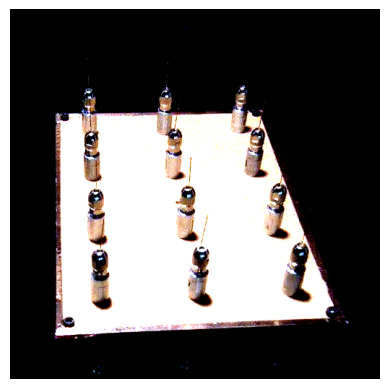

In [19]:
## 手动计算的均值和标准差进行归一化
# 读取图像
image_path = r'E:\workspace\Anaconda\Robot\InstanceSegmentation\dataset\cropped_image\rgb_20240327_231645.jpg'
image = Image.open(image_path)

# 将图像转换为numpy数组
image_np = np.array(image).astype('float32') / 255.0

# 归一化的均值和标准差
mean = np.array([0.4105, 0.3815, 0.3482])
std = np.array([0.3539, 0.3232, 0.2745])

# 对每个通道进行归一化
for i in range(3):
    image_np[:, :, i] = (image_np[:, :, i] - mean[i]) / std[i]

# 使用matplotlib显示归一化后的图像
plt.imshow(image_np)
plt.axis('off')  # 不显示坐标轴
plt.show()

[[[ 1  0  5]
  [ 1  0  5]
  [ 6  5 10]
  ...
  [32 40 42]
  [30 38 41]
  [32 40 43]]

 [[ 0  0  4]
  [ 0  0  4]
  [ 5  4  9]
  ...
  [32 40 42]
  [31 39 42]
  [31 39 42]]

 [[ 1  1  3]
  [ 0  0  2]
  [ 4  3  8]
  ...
  [32 40 42]
  [32 40 43]
  [31 39 42]]

 ...

 [[54 58 61]
  [59 63 66]
  [61 65 68]
  ...
  [26 26 28]
  [26 26 26]
  [27 27 27]]

 [[60 64 67]
  [62 66 69]
  [62 66 69]
  ...
  [26 26 26]
  [27 27 27]
  [29 29 29]]

 [[63 67 70]
  [63 67 70]
  [61 65 68]
  ...
  [23 23 23]
  [29 29 29]
  [34 34 34]]]


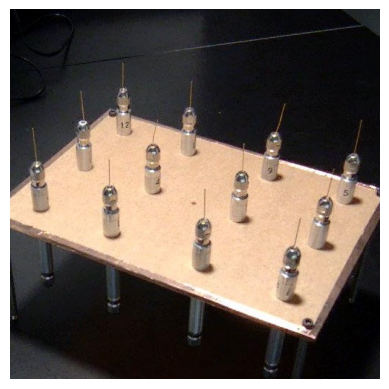

[[[-1.1488512  -1.1803837  -1.197057  ]
  [-1.1488512  -1.1803837  -1.197057  ]
  [-1.0934461  -1.1197159  -1.1256258 ]
  ...
  [-0.80533993 -0.69504106 -0.6684667 ]
  [-0.82750195 -0.7193082  -0.6827529 ]
  [-0.80533993 -0.69504106 -0.65418047]]

 [[-1.1599323  -1.1803837  -1.2113432 ]
  [-1.1599323  -1.1803837  -1.2113432 ]
  [-1.1045271  -1.1318494  -1.1399121 ]
  ...
  [-0.80533993 -0.69504106 -0.6684667 ]
  [-0.816421   -0.7071746  -0.6684667 ]
  [-0.816421   -0.7071746  -0.6684667 ]]

 [[-1.1488512  -1.1682502  -1.2256294 ]
  [-1.1599323  -1.1803837  -1.2399156 ]
  [-1.1156082  -1.143983   -1.1541983 ]
  ...
  [-0.80533993 -0.69504106 -0.6684667 ]
  [-0.80533993 -0.69504106 -0.65418047]
  [-0.816421   -0.7071746  -0.6684667 ]]

 ...

 [[-0.56155777 -0.47663686 -0.39702845]
  [-0.50615275 -0.415969   -0.32559735]
  [-0.4839907  -0.39170188 -0.29702488]
  ...
  [-0.871826   -0.86491096 -0.8684738 ]
  [-0.871826   -0.86491096 -0.89704627]
  [-0.860745   -0.8527774  -0.88276005]]

 [

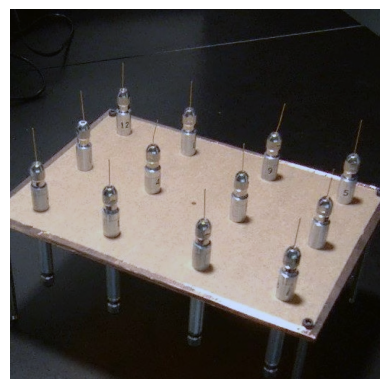

In [20]:
## 使用albumentations库进行归一化
# 读取图像
image_path = r'E:\workspace\Anaconda\Robot\InstanceSegmentation\dataset\cropped_image\rgb_20240327_231704.jpg'
mask_path = r'E:\workspace\Anaconda\Robot\InstanceSegmentation\dataset\cropped_mask\rgb_20240327_231704.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image)
# image = image.astype(np.float32)
plt.imshow(image)
plt.axis('off')  # 不显示坐标轴
plt.show()
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# 将图像转换为numpy数组
transform = A.Compose([A.Normalize(mean=(0.4105, 0.3815, 0.3482), std=(0.3539, 0.3232, 0.2745))])
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
print(transformed_image)
transformed_mask = transformed['mask']
# 使用matplotlib显示归一化后的图像
# 将图像归一化到0-1之间
normalized_img = (transformed_image - transformed_image.min()) / (transformed_image.max() - transformed_image.min())
plt.imshow(normalized_img)
plt.axis('off')  # 不显示坐标轴
plt.show()

## 4